# Enfoque clásico de series de tiempo 

**Estadistica aplicada**

**Lizbeth Ramos Saucedo**


**Sesión 12 a 17 de Marzo del 2023**

En el enfoque clásico de series del tiempo, se considera que una serie se puede descomponer en cuatro elementos:

1. Tendencia "T"
2. Ciclo "C"
3. Estacional "S"
4. Irregular "E"

Usualmente se considera que no es posible separar la tendencia del ciclo, por lo que se presentan junto en lo que se llama tendencia-ciclo (tendencia)


In [22]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline


In [23]:
pip install statsmodels

In [24]:
#Modelo ETS (eror- trend-seasonally)
#modelo de tendencia (ciclo)-estacional-irregular
from statsmodels.tsa.api import seasonal_decompose 

In [25]:
pasajeros = pasajeros=pd.read_csv ('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/airline_passengers.csv')

In [26]:
pasajeros

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [27]:
pasajeros=pasajeros.rename(columns={'Month':'mes', 'Thousands of Passengers':'miles de pasajeros'})

In [28]:
pasajeros 

,mes,miles de pasajeros
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [29]:
pasajeros['mes']=pd.to_datetime(pasajeros['mes']) #para que mes se reconozca como variable de fecha 

In [30]:
pasajeros

,mes,miles de pasajeros
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [31]:
pasajeros= pasajeros.set_index('mes') #mes sea el index

In [35]:
pasajeros 

,miles de pasajeros
mes,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [32]:
pasajeros.index.freq = ' MS'
#index tiene frecuencia mensual montly frecuency 

In [33]:
pasajeros.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='mes', length=144, freq='MS')

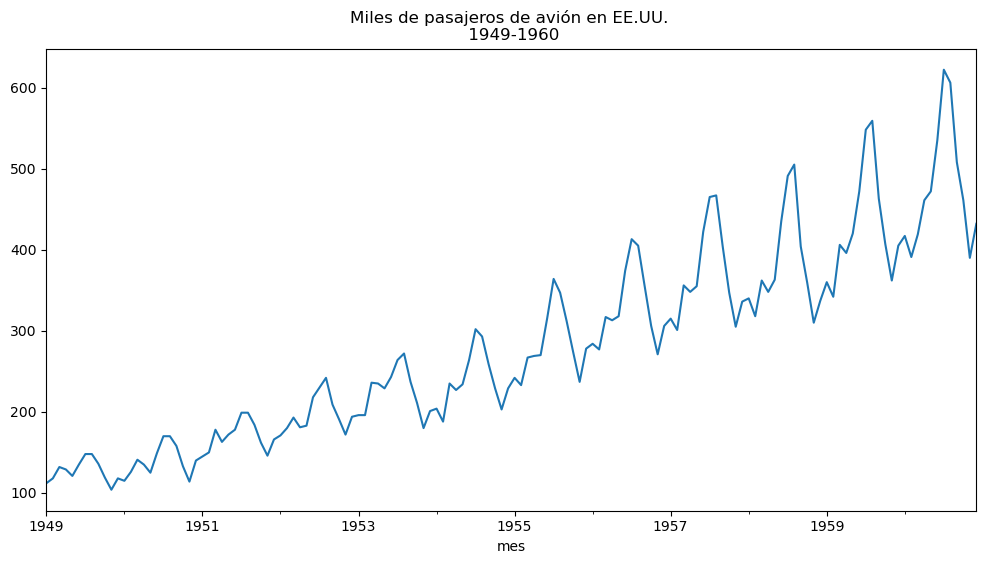

In [41]:
pasajeros ['miles de pasajeros' ].plot(figsize=(12,6));
plt.title('Miles de pasajeros de avión en EE.UU. \n 1949-1960');


#la grafica es estacionaria cada junio se dan mas vuelos


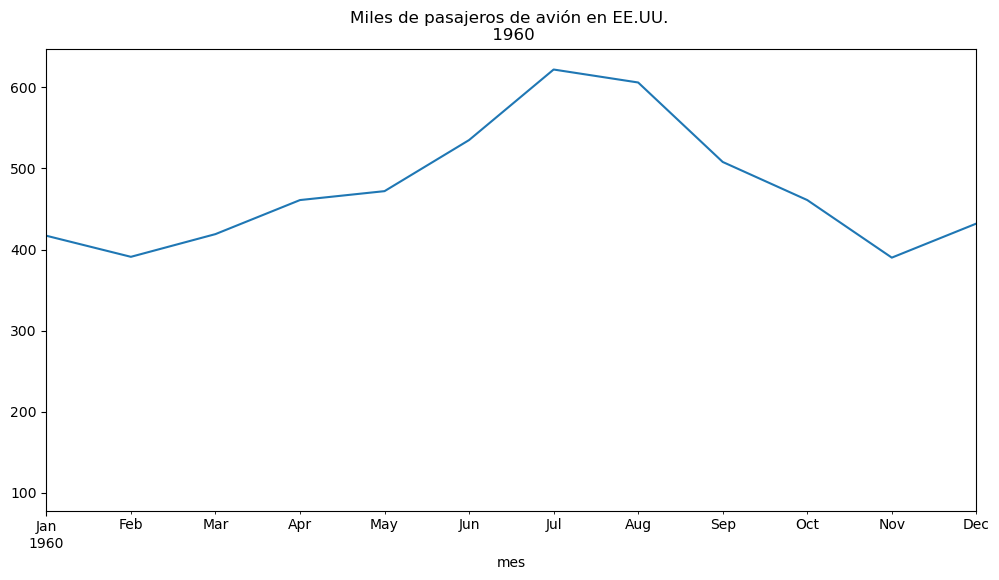

In [40]:
pasajeros ['miles de pasajeros' ].plot(figsize=(12,6));
plt.title('Miles de pasajeros de avión en EE.UU. \n 1960');
plt.xlim('1960-01', '1960-12'); # serie solo de 1960

In [42]:
serieETS = seasonal_decompose (pasajeros['miles de pasajeros'], model='mult')


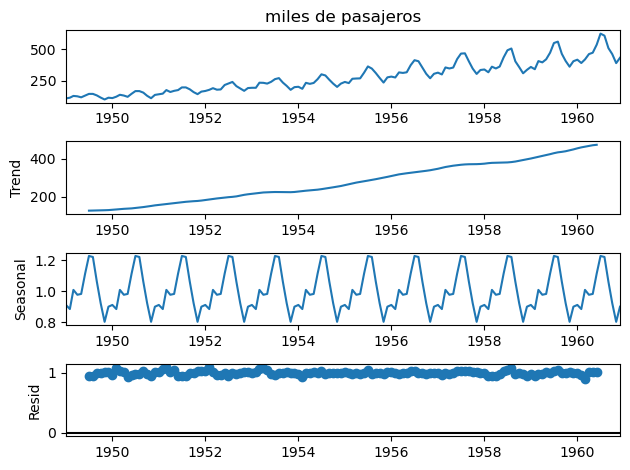

In [43]:
serieETS.plot()
plt.show()

Una serie destacionalizada ( Seasonally Adjusted) es una serie sin su componente estacional 

In [44]:
#acceder a su componente estacional 
serieETS.seasonal

#acceder a su componente de tendencia (ciclo )
serieETS.trend

#acceder al componente irregular 
serieETS.resid

mes
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Freq: MS, Name: resid, Length: 144, dtype: float64

In [49]:
pasajeros['destacionalizada']=pasajeros['miles de pasajeros']/serieETS.seasonal

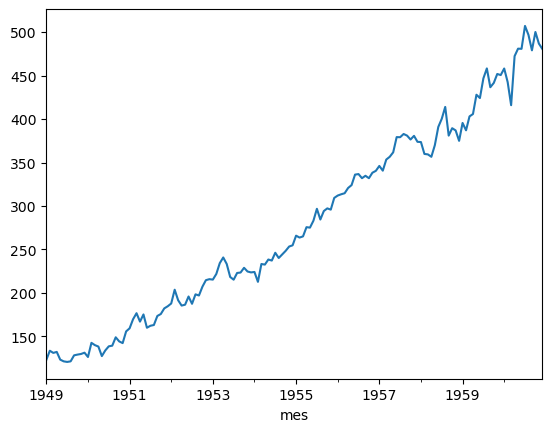

In [50]:
pasajeros['destacionalizada'].plot();

Covid en México 

In [59]:
confirmados = pd.read_excel('C:/Users/sauce/Downloads/covid_mex.xlsx')

In [60]:
confirmados.head()

,fecha,aguascalientes,baja california,baja california sur,campeche,chiapas,chihuahua,distrito federal,coahuila,colima,...,san luis potosi,sinaloa,sonora,tabasco,tamaulipas,tlaxcala,veracruz,yucatan,zacatecas,nacional
0,2020-02-26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-02-27,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,4
2,2020-02-28,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2
3,2020-02-29,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,2020-03-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [61]:
confirmados['fecha']=pd.to_datetime(confirmados['fecha'])


In [62]:
confirmados = confirmados.set_index('fecha')

In [63]:
confirmados.index.freq = 'D'

(18809.0, 19266.0)

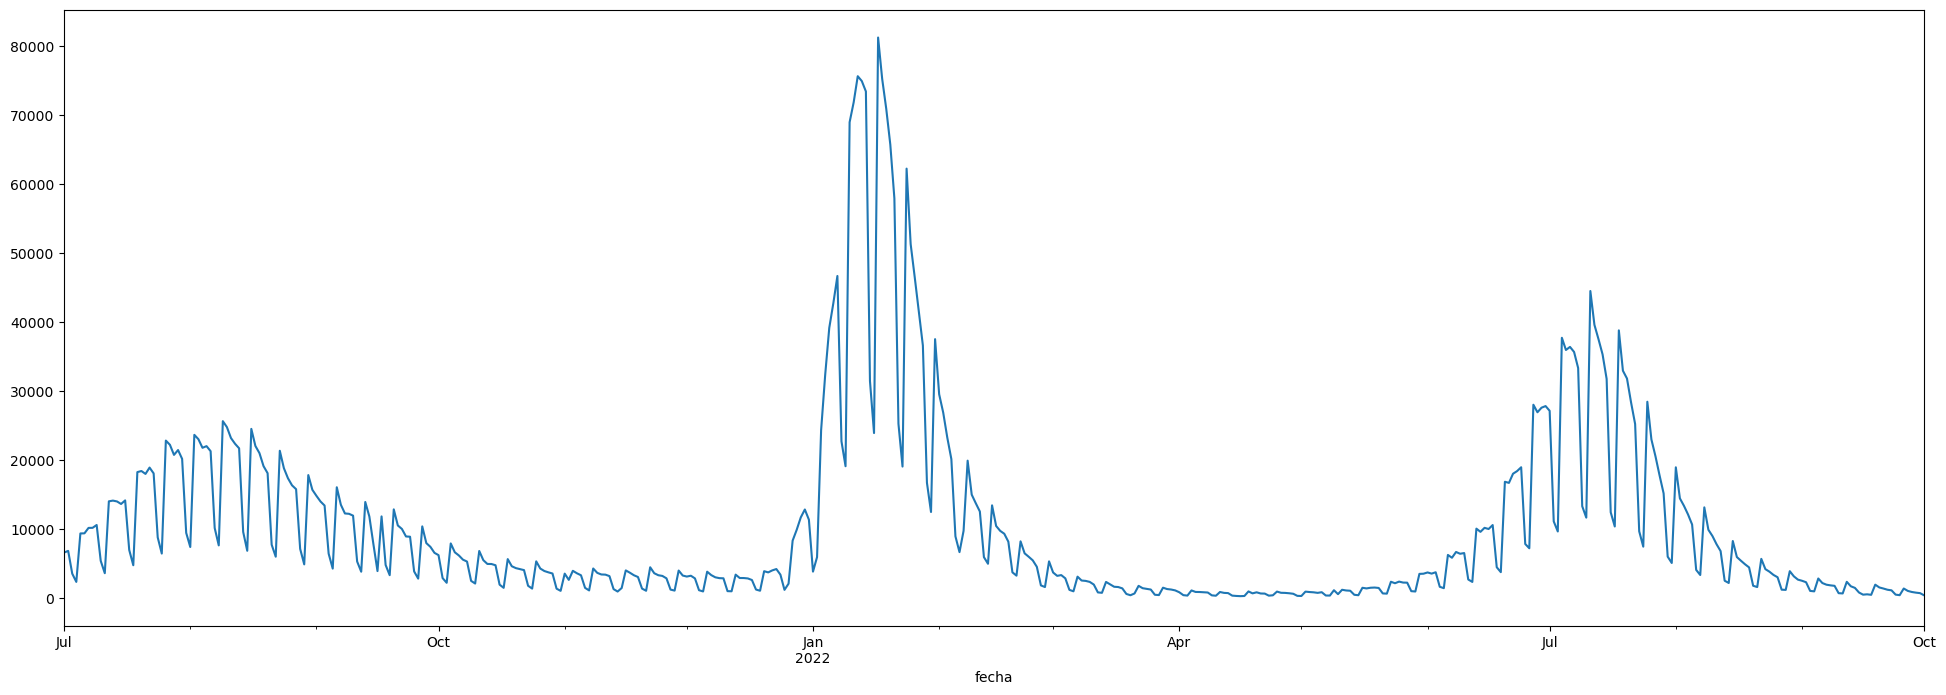

In [71]:
confirmados['nacional'].plot(figsize=(24,8));
plt.xlim('2021-07', '2022-10')

In [73]:
serie2 = seasonal_decompose(confirmados['nacional'], model='ad')

In [74]:
confirmados['tendencia nacional'] = serie2.trend

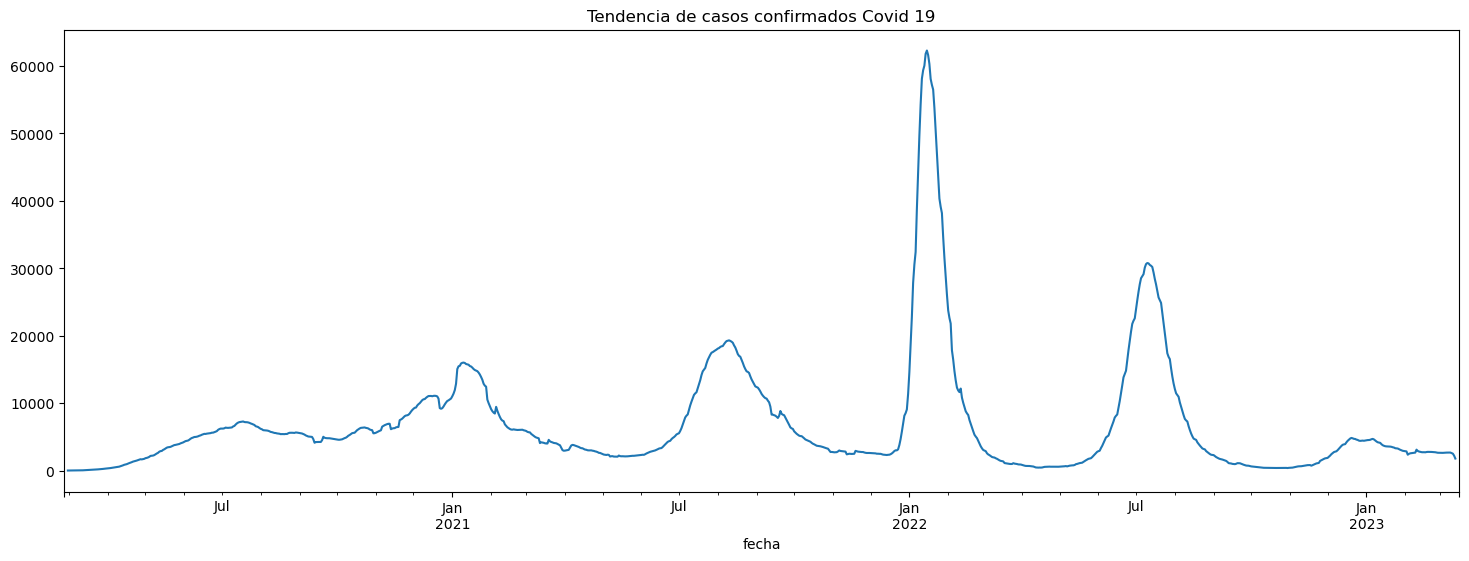

In [75]:
confirmados['tendencia nacional'].plot(figsize=(18,6))
plt.title('Tendencia de casos confirmados Covid 19')
plt.show();